In [1]:
#importing essenital packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# load data from csv file of different AGN
data=pd.read_csv("E:\\assignment\PRoject F13305.csv")

# extracting velocity from data
v = data['velocity']

#centroid values from data 
c = data['c']

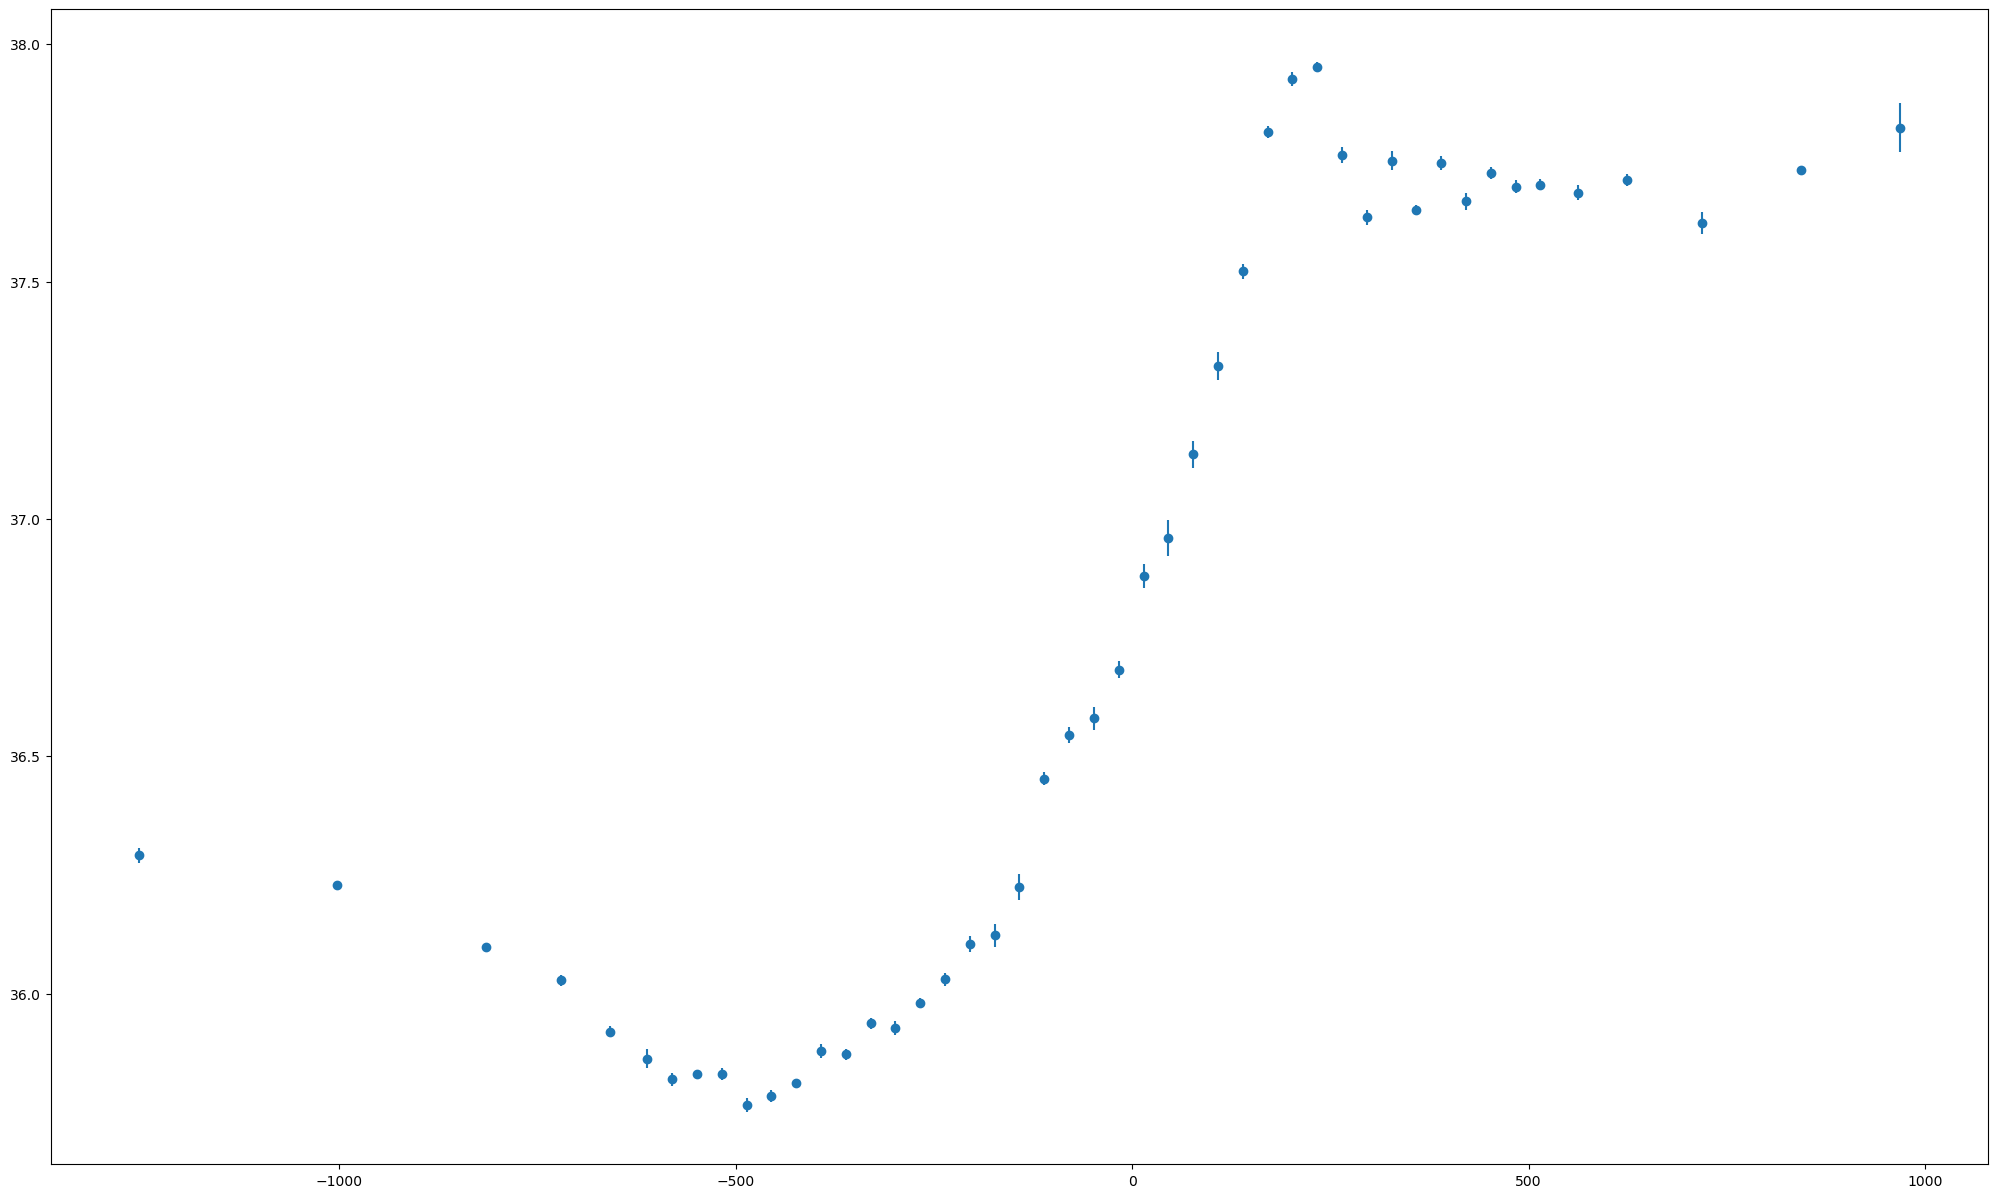

In [3]:
# inital plotting 
fig,ax=plt.subplots(figsize=(25,15))
plt.errorbar(v, c, yerr=data['uncenter'],fmt='o')

#subtracting centriod of star continuum and centroid of gaussian fit 

a = data['c'] - data['scentre'] # new radial extent of flux distrbution 

s_f = 2.506 # pixel scale for converting arcsec into kpc

s_w = 0.16 # spatial scale for converting pixel inot arcsec

#conversion of centriod (arcsec) into kpc units 
 
a1 = a * s_f * s_w
    
b1=data['uncenter']*s_w* s_f

c=data['error']*s_w*s_f

d=np.abs(b1+c) # error progation from star continuum and profile centroid

Text(0.5, 1.0, 'Velocity  vs Centroid value')

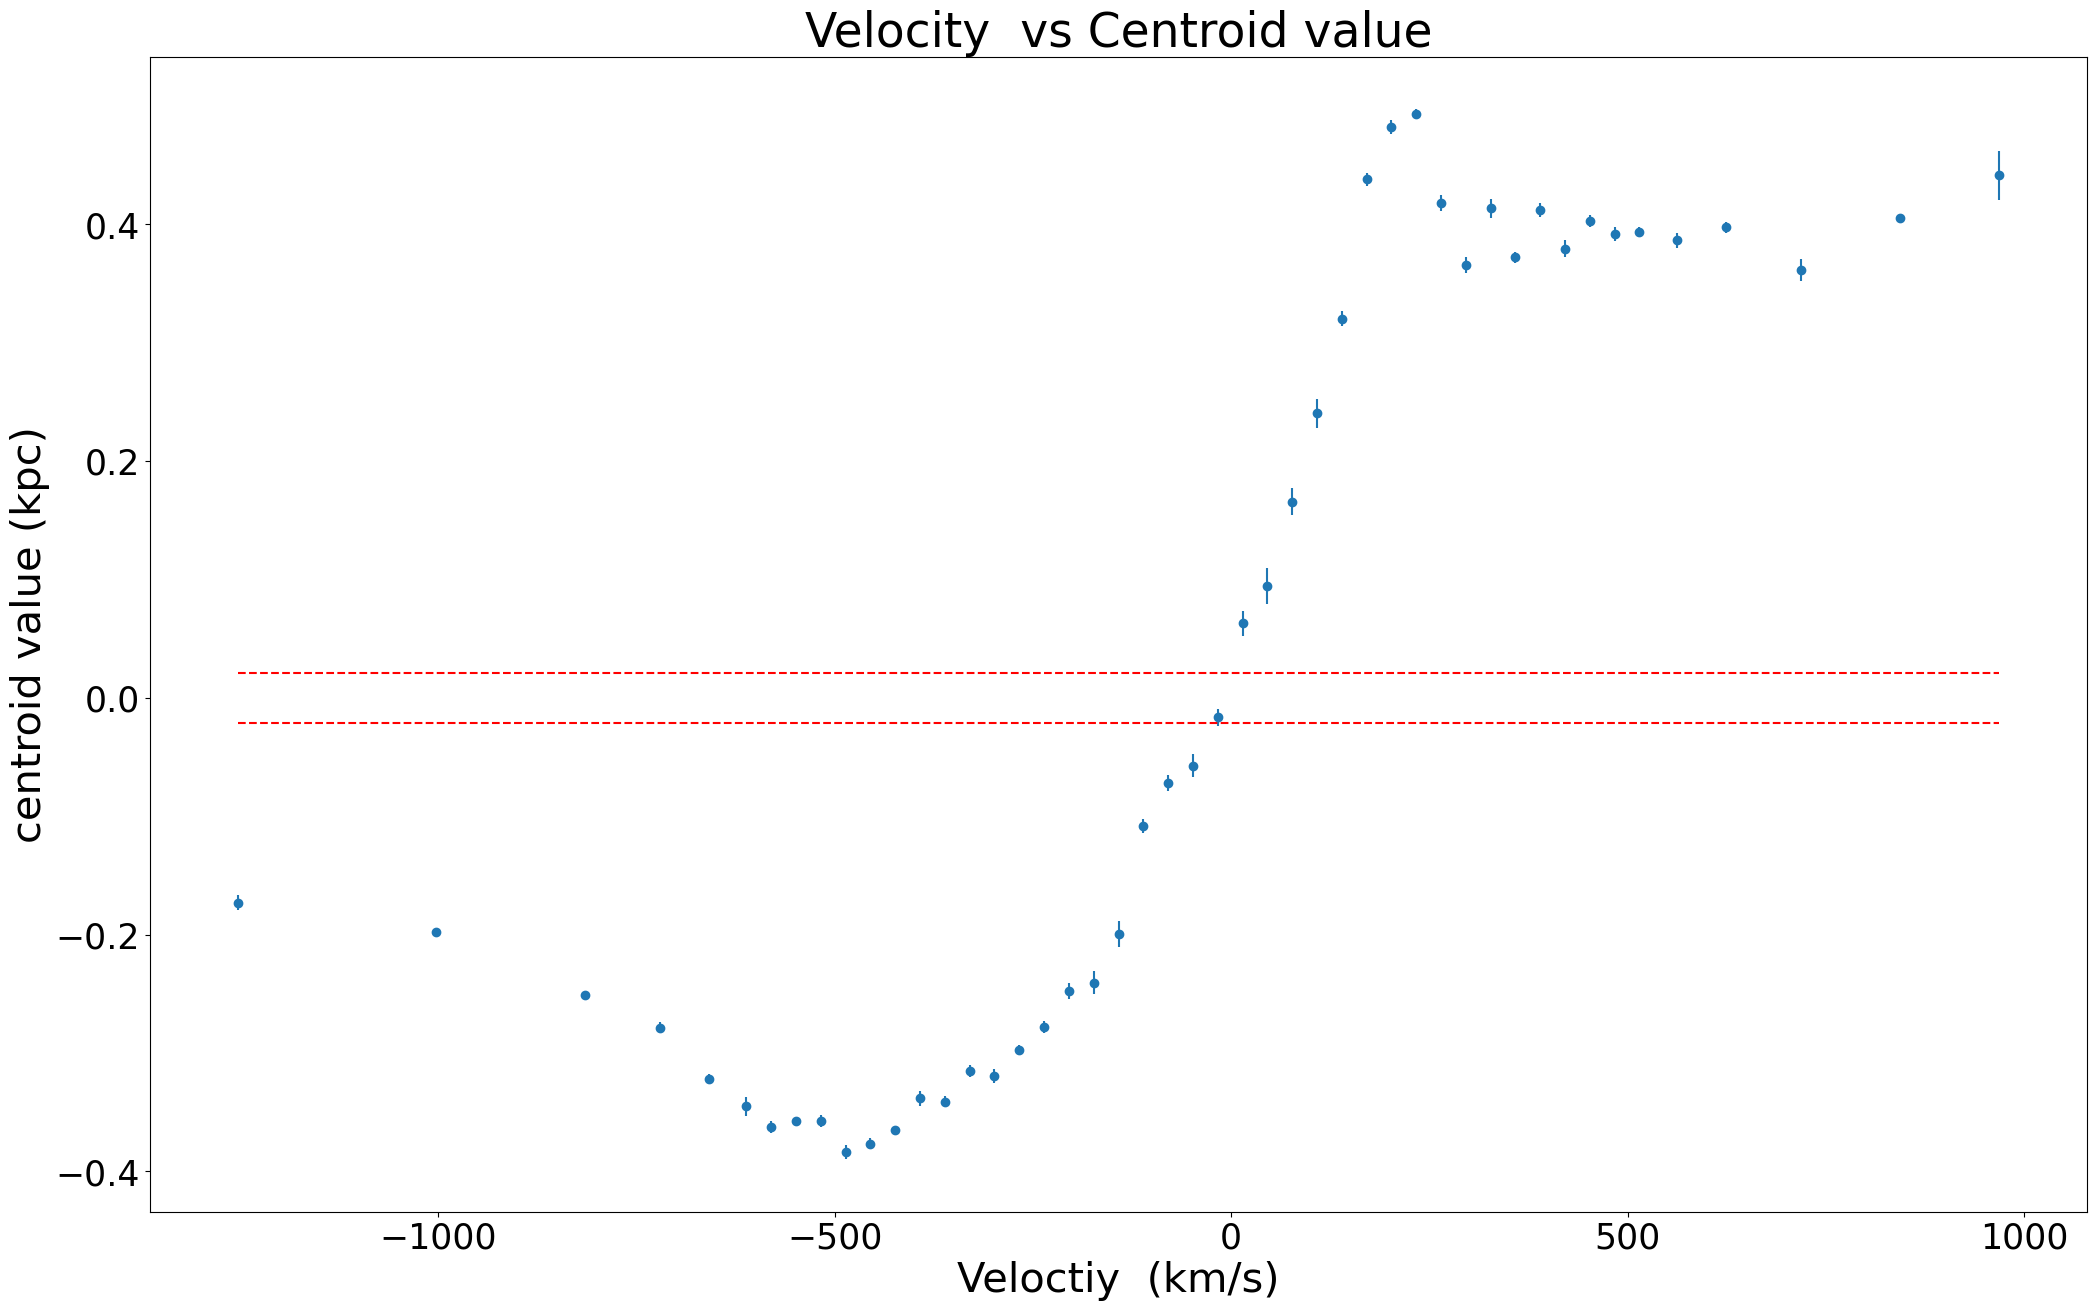

In [4]:
# plotting centriod vs velocity across emission line profile without cosidering the error from star continuum centroid

fig,ax=plt.subplots(figsize=(25,15))

plt.errorbar(v, a1, yerr=b1,fmt='o')

plt.plot(v,data['error']*s_w*s_f, color='r',linestyle='dashed') # using error of centroid from star continuum as BM positon 

plt.plot(v,-data['error']*s_w*s_f,color='r',linestyle='dashed') # using error of centroid from star continuum as BM positon 

plt.tick_params(labelsize=25) 

plt.xlabel('Veloctiy  (km/s)', fontsize = 30)

plt.ylabel('centroid value (kpc)', fontsize= 30)

plt.title ('Velocity  vs Centroid value', fontsize = 34)

Text(0.5, 1.0, 'Velocity  vs Centroid value')

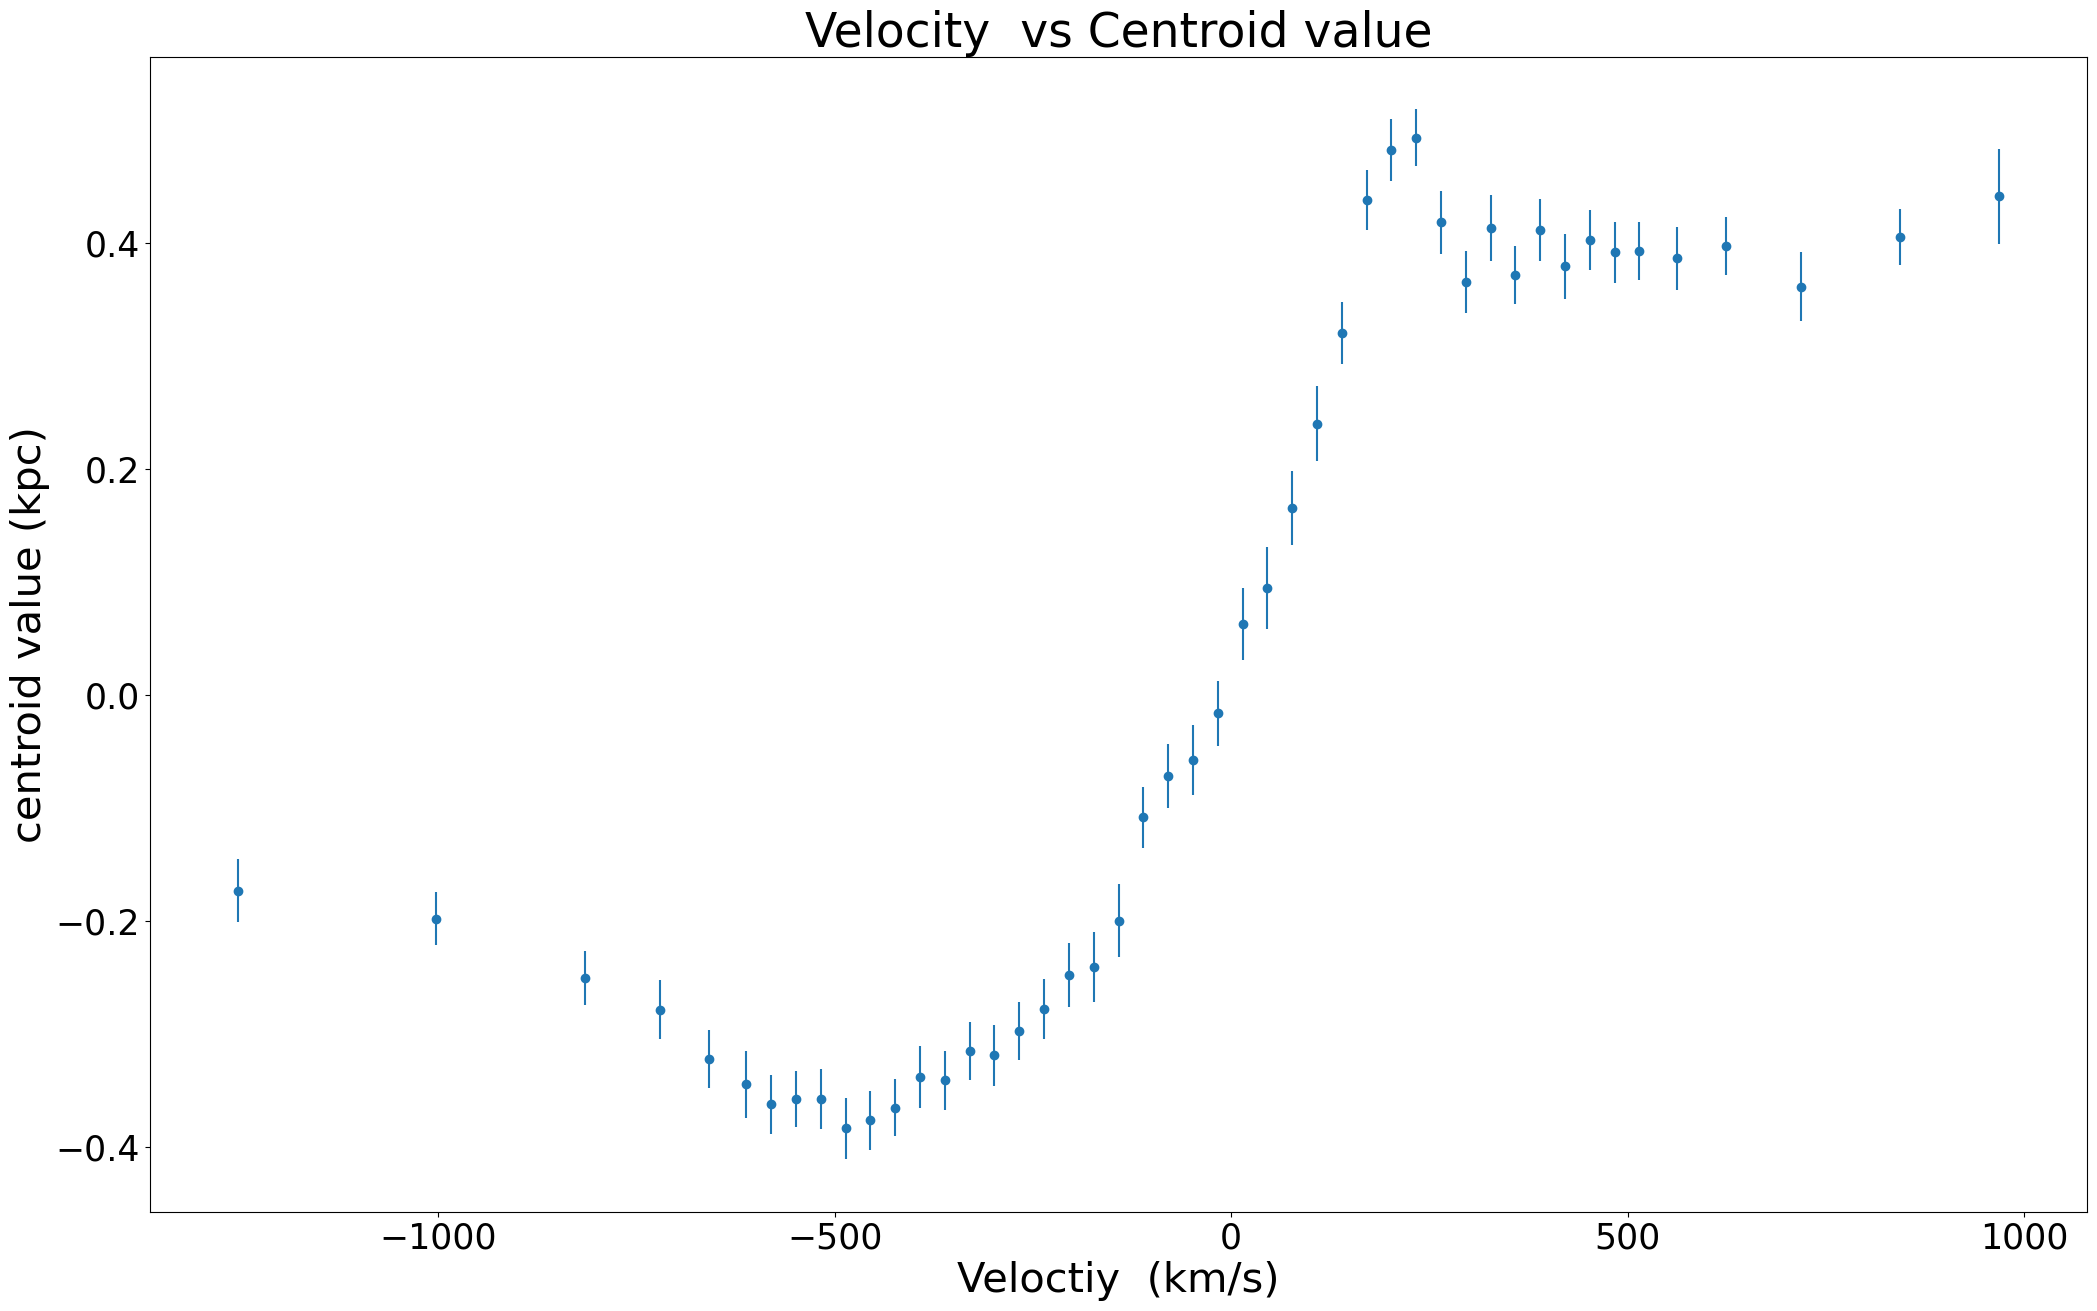

In [5]:
# plotting centriod vs velocity across emission line profile with the error from star continuum centroid

fig,ax=plt.subplots(figsize=(25,15))

plt.errorbar(v, a1, yerr=d,fmt='o')

plt.tick_params(labelsize=25) 

plt.xlabel('Veloctiy  (km/s)', fontsize = 30)

plt.ylabel('centroid value (kpc)', fontsize= 30)

plt.title ('Velocity  vs Centroid value', fontsize = 34)

In [6]:
# filtering out the data points outside the velocity range
filtered_data = data[(data['velocity'] < -300) | (data['velocity'] > 300)]

In [7]:
# defining a function to error weighted mean 
def calculate_weighted_mean_and_error(df, value_column, error_column):
    weights = 1 / df[error_column]**2
    weighted_mean = (df[value_column] * weights).sum() / weights.sum()
    error_on_weighted_mean = (1 / weights.sum())**0.5
    return weighted_mean, error_on_weighted_mean

# Sample arrays of the filtered data
n_a = filtered_data ['c'] - filtered_data['scentre']

n_a1=n_a*s_w*s_f

n_b1= filtered_data['uncenter']*s_w*s_f

n_c= filtered_data['error']*s_w*s_f

d1= n_b1+n_c

# making new data base of the filtered data 
df = pd.DataFrame({'centre': n_a1, 'error': d1})

# extracting the bluesjift region data
filtered_dfb= df[(df['centre']<0)]

#extracting the redshift region data
filtered_dfr = df[(df['centre']>0)]

# Calculate weighted mean and its error
mean, error = calculate_weighted_mean_and_error(df, 'centre', 'error')

meanb, errorb = calculate_weighted_mean_and_error(filtered_dfb, 'centre', 'error')

meanr, errorr = calculate_weighted_mean_and_error(filtered_dfr, 'centre', 'error')

print('Weighted Mean:', mean)

print('Error on Weighted Mean:', error)

print('Weighted Mean of blueshift points:', meanb)

print('Error on Weighted Mean:', errorb)

print('Weighted Mean of redshift region:', meanr)

print('Error on Weighted Mean:', errorr)

Weighted Mean: -0.021859671937415427
Error on Weighted Mean: 0.005134907550067313
Weighted Mean of blueshift points: -0.3156758408166092
Error on Weighted Mean: 0.006705916667322976
Weighted Mean of redshift region: 0.39460705528996726
Error on Weighted Mean: 0.00798381493582617


Text(0, 0.5, 'centroid shift (kpc)')

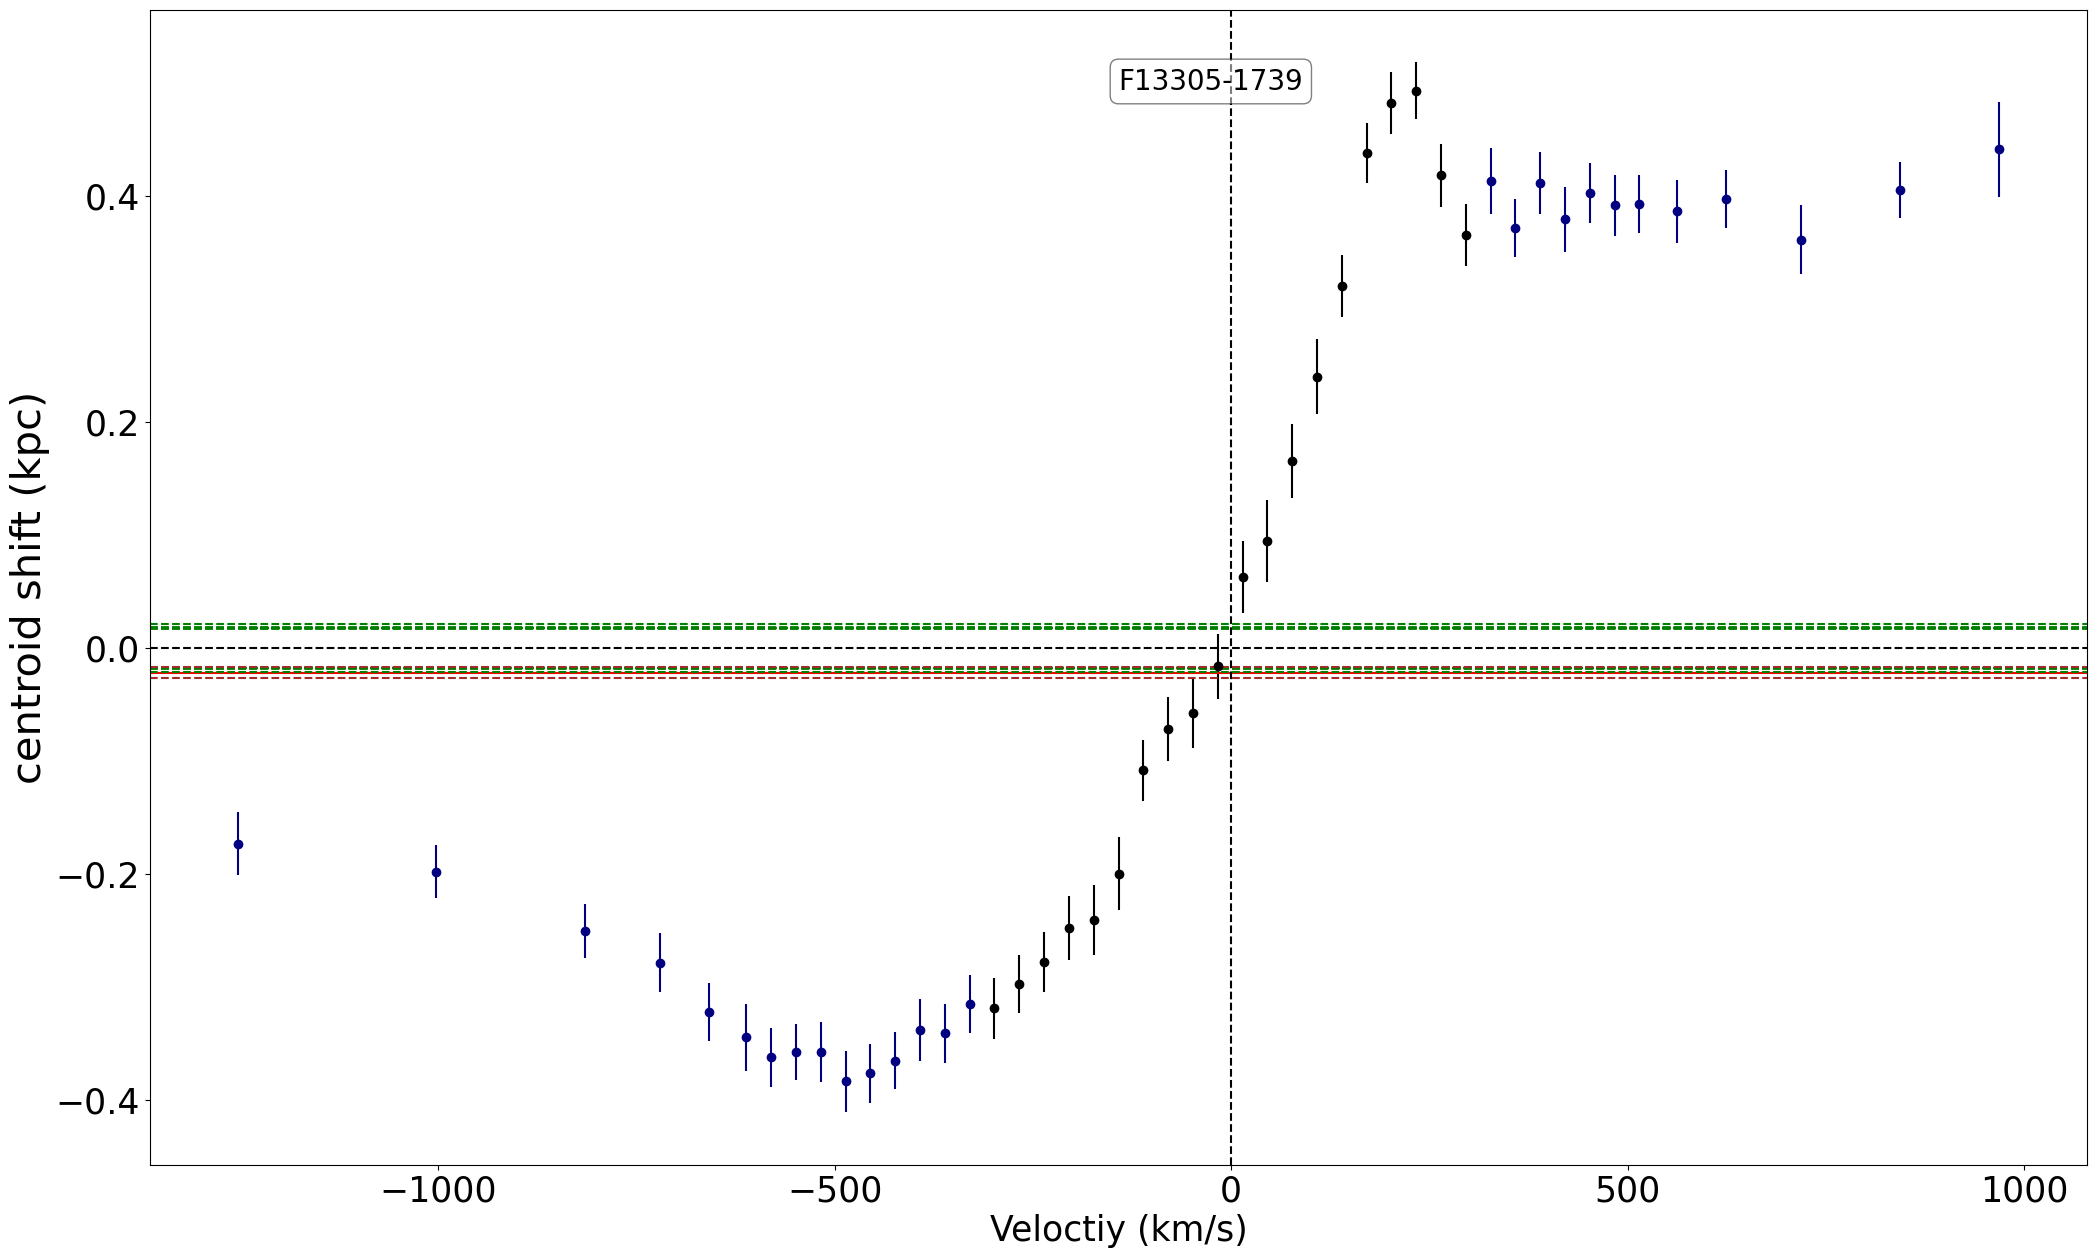

In [8]:
# plotting with the radial extent of the outflow by taking whole average of the data
fig, ax = plt.subplots(figsize=(25, 15))

for velocity, cent, err in zip(v, a1, d):
    color = 'black' if -300 <= velocity <= 300 else 'navy'
    plt.errorbar(velocity, cent, yerr=err, fmt='o', color=color)
    
plt.text(0.5, 0.95, 'F13305-1739', transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.axhline(y=mean,color='red')

plt.axhline(y=0,color='black',linestyle='dashed')

for value in data['error']:
    plt.axhline(y=value*0.16*2.120, color='g',linestyle='dashed')
    plt.axhline(y=-value*0.16*2.120, color='g',linestyle='dashed')
    
plt.axhline(y=data['error'].iloc[0]*0.16*s_f, color='g',linestyle='dashed')

plt.axhline(y=-data['error'].iloc[0]*0.16*s_f,color='g',linestyle='dashed')

plt.axhline(y=mean+error, color='brown',linestyle='dashed')

plt.axhline(y=mean-error,color='brown',linestyle='dashed')

plt.axvline(x=0,color='black',linestyle='dashed')

plt.tick_params(labelsize=25) 

plt.xlabel('Veloctiy (km/s)', fontsize = 25)

plt.ylabel('centroid shift (kpc)', fontsize= 30)

Text(0, 0.5, 'centroid shift (kpc)')

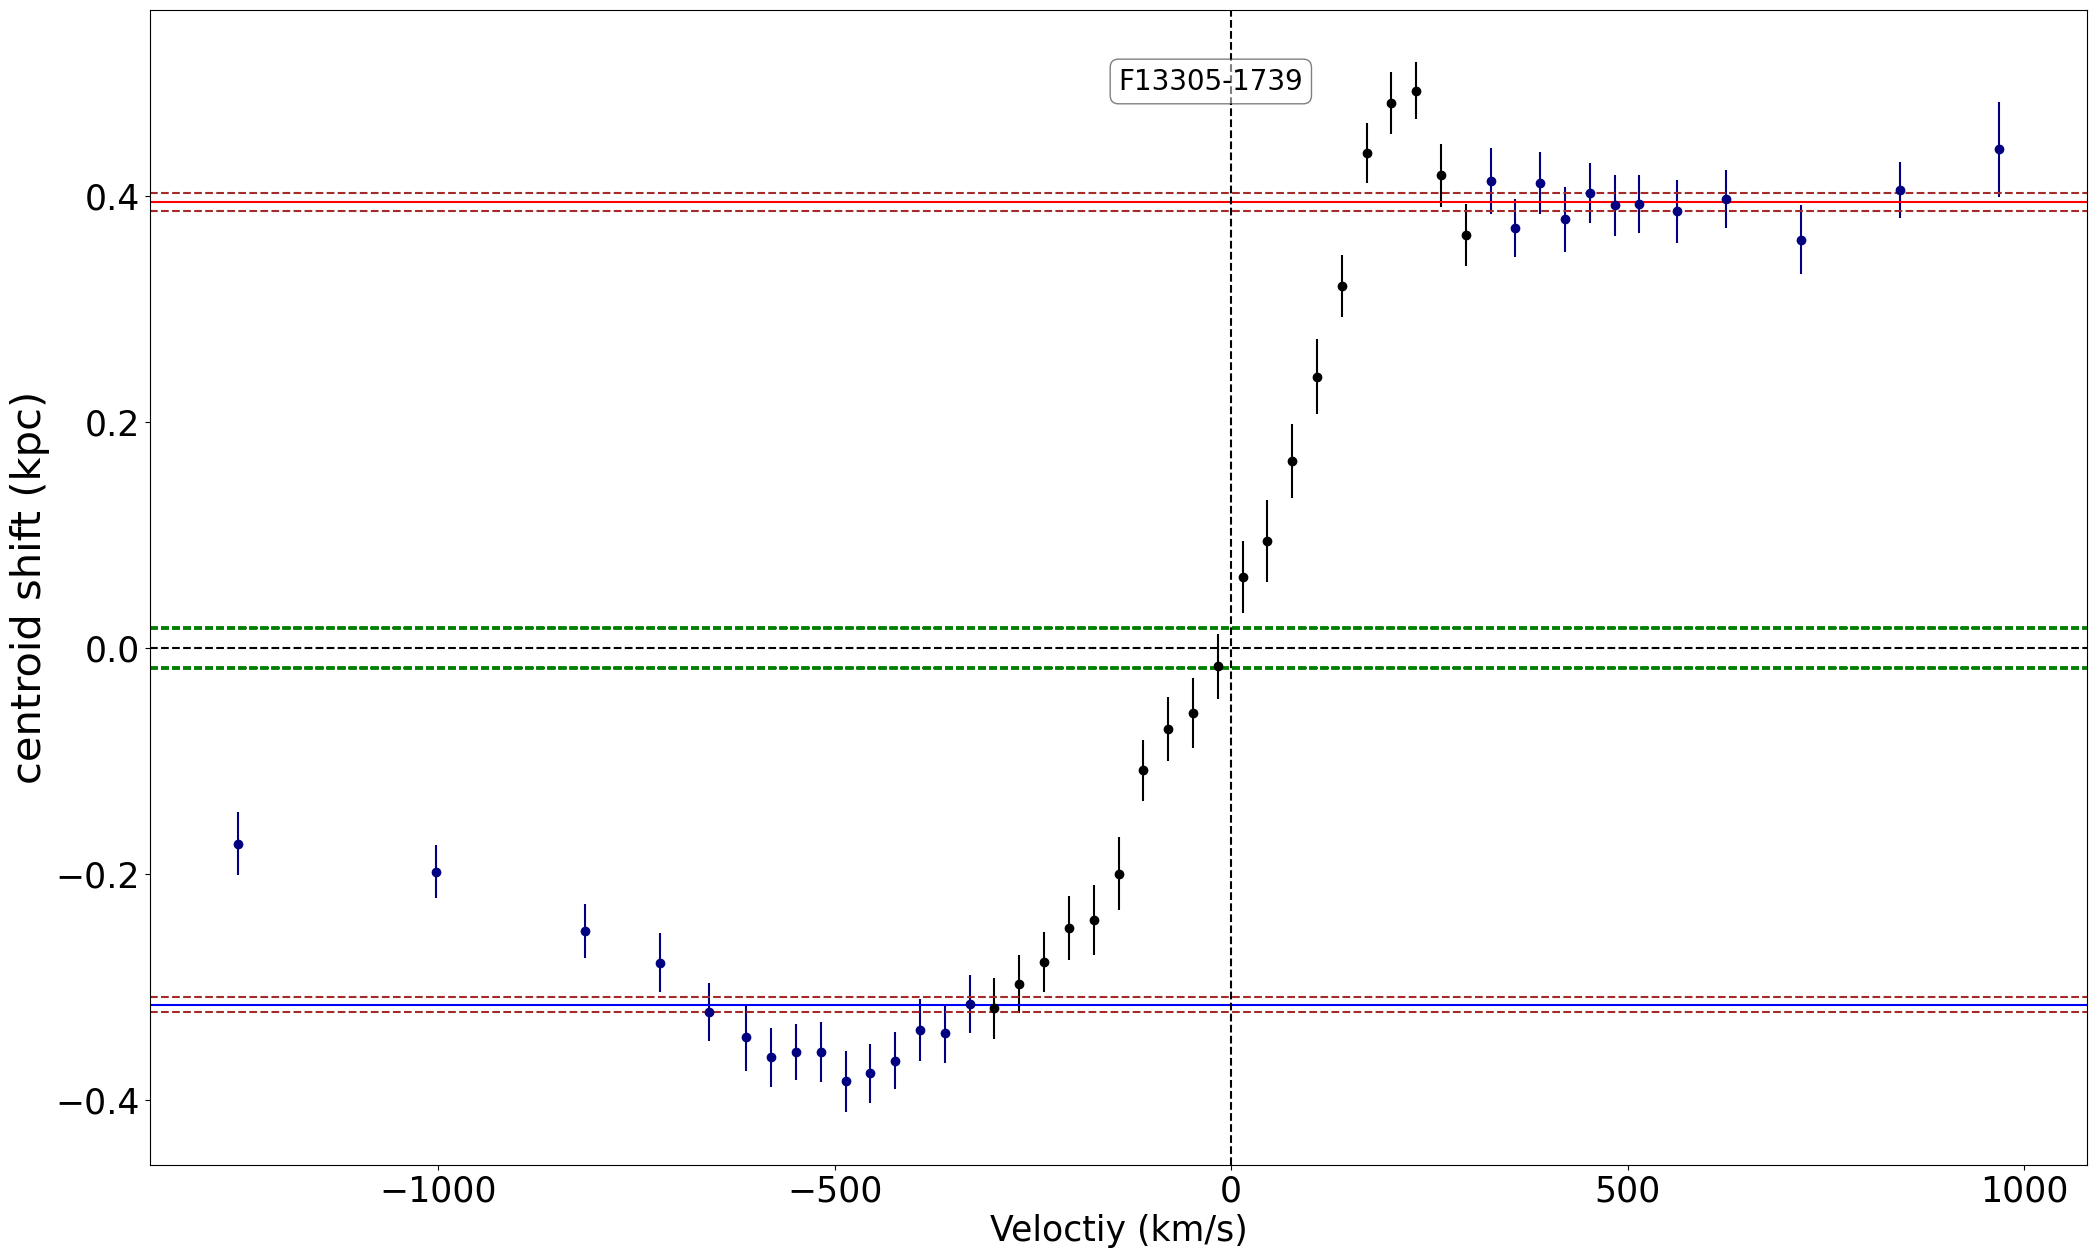

In [9]:
# for plot redshift and blueshift region mean values
fig, ax = plt.subplots(figsize=(25, 15))

for velocity, cent, err in zip(v, a1, d):
    color = 'black' if -300 <= velocity <= 300 else 'navy'
    plt.errorbar(velocity, cent, yerr=err, fmt='o', color=color)
    
plt.text(0.5, 0.95, 'F13305-1739', transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.axhline(y=meanr,color='red')

plt.axhline(y=0,color='black',linestyle='dashed')

for value in data['error']:
    plt.axhline(y=value*0.16*2.120, color='g',linestyle='dashed')
    plt.axhline(y=-value*0.16*2.120, color='g',linestyle='dashed')
    
plt.axhline(y=meanr+errorr, color='brown',linestyle='dashed')

plt.axhline(y=meanr-errorr,color='brown',linestyle='dashed')

plt.axhline(y=meanb,color='blue')

plt.axhline(y=meanb+errorb, color='brown',linestyle='dashed')

plt.axhline(y=meanb-errorb,color='brown',linestyle='dashed')

plt.axvline(x=0,color='black',linestyle='dashed')

plt.tick_params(labelsize=25) 

plt.xlabel('Veloctiy (km/s)', fontsize = 25)

plt.ylabel('centroid shift (kpc)', fontsize= 30)